The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

In [26]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

What is the most commonly awarded gender and birth country?

In [27]:
# Getting data from files
nobel = pd.read_csv("data/nobel.csv")

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [28]:
# Count instances of the "sex" column
nobel.value_counts("sex")

sex
Male      905
Female     65
dtype: int64

In [29]:
# Count instances of the "birth_country" column
nobel.value_counts("birth_country").head()

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
dtype: int64

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [30]:
# Creating a decade column
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

In [31]:
# Creating a boolean column with US winners
nobel['us_winners'] = nobel['birth_country'] == "United States of America"

In [32]:
# Calculating the mean of US winners by decade
mean_usa_winners = nobel.groupby("decade", as_index= False)['us_winners'].mean()
mean_usa_winners.head()

,decade,us_winners
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


In [33]:
# Sorting the mean DataFrame
mean_usa_winners = mean_usa_winners.sort_values("us_winners",
                                                ascending = False,
                                                ignore_index= True)
mean_usa_winners.head()

,decade,us_winners
0,2000,0.422764
1,1990,0.403846
2,2020,0.360000
3,1980,0.319588
4,1970,0.317308


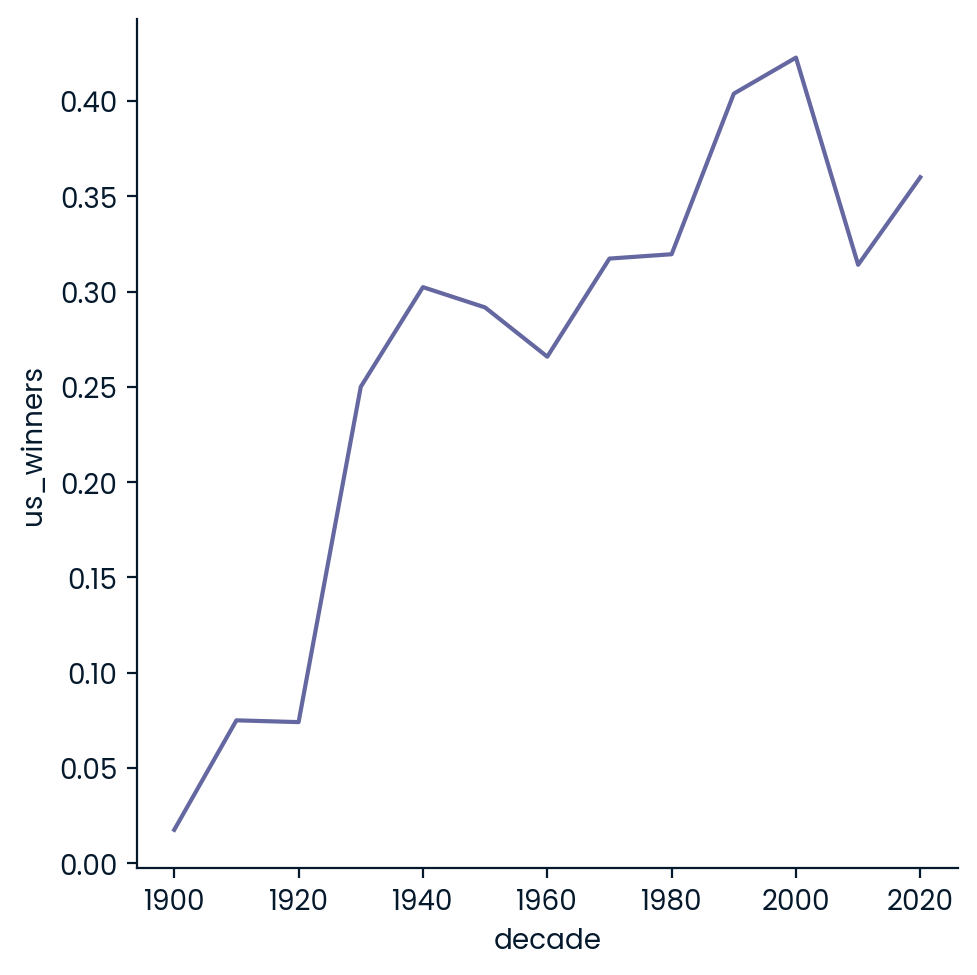

In [34]:
sns.relplot(x='decade', y='us_winners', data=mean_usa_winners, kind="line")

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [35]:
nobel['is_female'] = nobel['sex'] == "Female"

In [36]:
# Organizing decade and category by the female gender
decade_category_ratio = nobel.groupby(["decade", "category"])["is_female"].mean()
decade_category_ratio = decade_category_ratio.sort_values(ascending= False)
decade_category_ratio = decade_category_ratio.reset_index()
decade_category_ratio

,decade,category,is_female
0,2020,Literature,0.500000
1,2010,Peace,0.357143
2,1990,Literature,0.300000
3,2000,Literature,0.300000
4,2020,Chemistry,0.300000
...,...,...,...
67,1960,Peace,0.000000
68,1970,Economics,0.000000
69,1970,Literature,0.000000
70,1970,Physics,0.000000


In [37]:
max_female_dict = {
    decade_category_ratio['decade'].values[0]: decade_category_ratio['category'].values[0]
}

max_female_dict

{2020: 'Literature'}

Who was the first woman to receive a Nobel Prize, and in what category?

In [38]:
nobel_women = nobel[nobel["is_female"] == True]
nobel_women_year = nobel_women["year"]

# Storing the first woman to win a nobel in row_min
row_min = nobel["year"] == nobel_women_year.min()
nobel_women[row_min]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,us_winners,is_female
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,False,True


In [39]:
first_woman_name = nobel_women[row_min]["full_name"].values[0]
first_woman_category = nobel_women[row_min]["category"].values[0]

print(first_woman_name, first_woman_category)

Marie Curie, née Sklodowska Physics


Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [40]:
repeat_list = nobel.value_counts("full_name")
repeat_list = repeat_list[repeat_list >= 2]
repeat_list = list(repeat_list.index.values)

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Frederick Sanger',
 'Linus Carl Pauling',
 'John Bardeen',
 'Marie Curie, née Sklodowska']